In [2]:
# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation
#the data set contains 5000 rows with 14 variables, 2 variables (ID, zip.code) are not used to build model
#5 variables (Personal.Loan, Securities.Account, CD.Account, Online, CreditCard) are binary variables with only (0,1) values
import pandas as pd
df=pd.read_csv("Dataset.csv")
mydf=pd.DataFrame(df)
mydf.head()
mydf.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [3]:
mydf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
type(mydf)
mydf.shape

(5000, 14)

In [5]:
# 2(1). Number of unique in each column
mydf.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
# 2(2). Number of people with zero mortgage
#in total 3462 people out of 5000 have zero mortgage with the bank
(mydf["Mortgage"] == 0).sum()

3462

In [7]:
# 2(3). Number of people with zero credit card spending per month
#in total 3530 people out of 5000 have zero credit card spending per month in this bank
(mydf["CreditCard"] == 0).sum()

3530

In [8]:
# 2(4). Value counts of all categorical columns
#value count of Personal.Loan:4520 data points with 0, 480 data points with 1
#Securities.Account:4478 data points with 0, 522 data points with 1
#CD.Account:4698 data points with 0, 302 data points with 1
#Online:2016 data points with 0, 2984 data points with 1
#CreditCard:3530 data points with 0, 1470 data points with 1
mydf["Personal Loan"].value_counts()
mydf["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

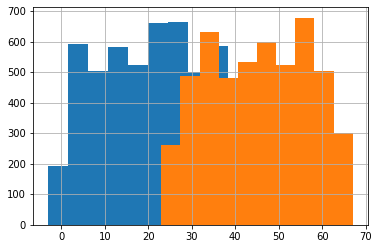

In [9]:
# 2(5). Univariate and Bivariate
#Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
mydf.Experience.hist()
mydf.Age.hist()

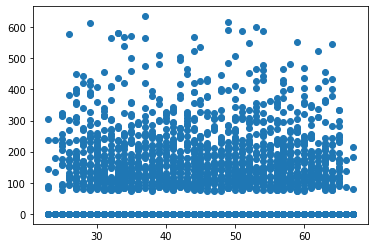

In [10]:
#Bivariate analysis
#age vs mortgage: graphically people around 35 or between 45-50 have more mortgage than other age groups
plt.scatter(mydf["Age"],mydf["Mortgage"])

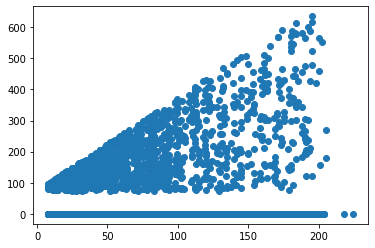

In [11]:
#income vs mortgage: graphically people with higher income also have higher amount of mortgage
plt.scatter(mydf["Income"],mydf["Mortgage"])

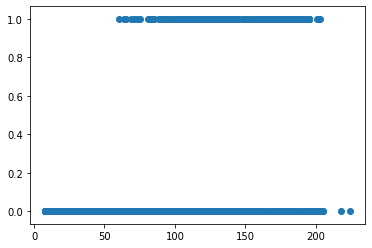

In [12]:
#income with personal loan: graphically people with higher income also have higher chance to have personal loan
plt.scatter(mydf["Income"],mydf["Personal Loan"])

In [13]:
# 3. Split the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mydf[["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Securities Account","CD Account","Online","CreditCard"]], mydf["Personal Loan"],test_size=0.3,random_state=0)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2858,36,11,158,2,7.8,1,114,0,0,1,1
1559,59,35,102,4,3.0,2,115,0,0,1,0
1441,58,33,43,2,1.6,3,0,0,0,1,0
2179,49,23,68,1,1.5,2,0,0,0,0,0
1390,29,3,80,4,1.8,2,0,0,0,1,1


In [14]:
# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not.
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit = logreg.fit(x_train,y_train)

/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
#Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score).
y_pred = logreg.predict(x_test)
print('Accuracy: {:.2f}'.format(logreg.score(x_test, y_test)))
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:',recall)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:',precision)
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred, average='macro')
print('f1score:',f1score)
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
print('ROC_AUC_Score:',logit_roc_auc)

Accuracy: 0.95
Recall: 0.7892219387755102
Precision: 0.8732208595719041
f1score: 0.8246246246246247
ROC_AUC_Score: 0.7892219387755102


In [16]:
#Draw a heatmap to display confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1351   21]
 [  52   76]]


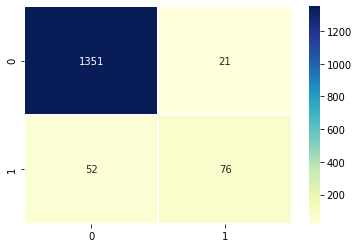

In [17]:
import numpy as np
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidth=0.5, cmap="YlGnBu")
plt.show()
#the graph shows the true positive(0,0)has the highest value which 1351, next is true negative(1,1) which is 76.

In [18]:
# 5. Find out coefficients of all the attributes and show the output in a data frame with column names
from statsmodels.discrete.discrete_model import Logit
print(Logit(y_train,x_train).fit().summary())

Optimization terminated successfully.
         Current function value: 0.135199
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.5857
Time:                        17:56:41   Log-Likelihood:                -473.20
converged:                       True   LL-Null:                       -1142.2
Covariance Type:            nonrobust   LLR p-value:                2.451e-281
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5068      0.026    -19.272      0.000      -0.558      -0.455
Exper

In [19]:
#For test data show all the rows where the predicted class is not equal to the observed class.
y_pred != y_test

398     False
3833    False
4836    False
4572    False
636     False
        ...  
4554    False
4807    False
1073    False
2906    False
1357    False
Name: Personal Loan, Length: 1500, dtype: bool

In [ ]:
# 6. Give conclusion related to the Business understanding of your model:
#Based on the confusion matrix from the training model, this model actually has an accuracy of 0.95, precision of 0.87, and Roc_auc_score is 0.789, so we can conclude that this model is relatively a good fit.
#Using the analysis result from the fitted model, we can see that over the 11 factors displayed, Experience, Family, Education, CCAvg, CD.Account have the highest impact for Personal.Loan.
#So in the future, if the marketing department want to find out which customers will most likely apply for the loan, they should target customers with the following characteristics:
#A liability customer(CD.Account) with high Education, bigger family size, high average spending on credit card(CCAvg), and higher working experience.
#In addition, if we can have credit card spending amount and CD account amount, those data will be more valuable for fitting the model.